# Análise de sentimentos de um produto vendido em e-commerce
Neste projeto, foram analisados os sentimentos dos clientes de uma mochila vendida no Mercado Livre.
A partir de uma base de dados de comentários disponível no Kaggle, foi realizada a extração dos tokens, a remoção das stopwords e dos caracteres numéricos e a produção de nuvens de palavras e gráficos para análise da frequência dos sentimentos. Por fim, foi criado um índice para mensurar o sentimento geral dos clientes em relação ao produto. O passo a passo encontra-se abaixo.

In [1]:
# Instalar e carregar pacote necessário para a manipulação dos dados
# install.packages("tidyverse")
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Obter os dados e visualizar as primeiras linhas da tabela
df <- read_csv('/kaggle/input/avaliaes-em-portugus-amazon-e-mercado-livre/ml_scrape_final.csv', show_col_types = FALSE)
head(df)

Pesquisa,Titulo,Link,Comentario
<chr>,<chr>,<chr>,<chr>
smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram,https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281,A foto fica amarelada quando eu vou fotografar com celular.
smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram,https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281,👏🏼👏🏼👏🏼👏🏼👏🏼👏🏼.
smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram,https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281,Muito bom.
smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram,https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281,Produto muito bom dei de presente pra meu filho ele tá amando só esperava vir ao menos com o fone de ouvido mais não veio mais do resto perfeito.
smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram,https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281,Recomendo.
smartphone,Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram,https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281,"Maravilhoso, potência perfeita em questão do preço!."


In [3]:
# Verificar quantos produtos diferentes há na base de dados
df %>% summarize(n_produtos = n_distinct(Titulo))

n_produtos
<int>
896


In [4]:
# Verificar número de comentários por produto
freq <- df %>% count(Titulo) %>% arrange(desc(n))
head(freq, 5)

Titulo,n
<chr>,<int>
Mochila Masculina Faculdade Impermeável Resistente Grande,700
Umidificador De Ar Aromatizador Purificador Portátil Led Rgb,428
Kit Com 3 Camisa Gola Polo Marine Em Malha Piquet Camiseta,404
Relógio Smartwatch Android Ios Inteligente D20 Bluetooth Nfe,401
5 Camiseta Masculina Camisas Slim Voker 100% Algodão Atacado,396


In [5]:
# Selecionar produto com maior número de comentários para termos o máximo de dados possível
coment_prod <- df %>% filter(Titulo == 'Mochila Masculina Faculdade Impermeável Resistente Grande') %>% select(Comentario)

In [38]:
# Obter link do produto para visualizá-lo
link <- df %>% filter (Titulo == 'Mochila Masculina Faculdade Impermeável Resistente Grande')
print(link$Link[1])

[1] "https://produto.mercadolivre.com.br/MLB-1778741590-mochila-masculina-faculdade-impermeavel-resistente-grande-_JM#position=5&search_layout=grid&type=item&tracking_id=8ce73190-a8fa-4de3-985e-6ef8f6e62f97"


In [6]:
# Verificar se já está no formato tibble
str(coment_prod)

tibble [700 × 1] (S3: tbl_df/tbl/data.frame)
 $ Comentario: chr [1:700] "Bom dia, não gostei do que comprei, vcs mostra no encarte uma coisa e manda outra. Dessa mochila aqui eu compro"| __truncated__ "Péssima.\nNunca comprei uma mochila tão ruim, e de péssima qualidade igual essa! menos de dois meses de uso est"| __truncated__ "Bom dia, não gostei da mochila material péssimo, já está descosturando em várias partes da mochila,pelo o valor"| __truncated__ "As alças não viram conforme a foto, vira com apenas uma costura e sem o acolchoado, para carregar com peso fica"| __truncated__ ...


In [7]:
# Instalar e carregar pacote necessário para criar tokens a partir dos comentários
#install.packages("tidytext")
library("tidytext")

In [8]:
# Realizar mineração do texto (obtenção de tokens)
coment_prod_tokens <- coment_prod %>% 
                        unnest_tokens(word, Comentario) %>% # Extrair tokens
                        filter(!grepl('[0-9]', word)) # Remover números

# Caso queira remover emojis:
#filter(!grepl('[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]', word)) # Remover emojis

In [9]:
# Instalar e carregar pacote necessário para remover palavras sem significado para a análise
#install.packages("stopwords")
library("stopwords")

In [10]:
# Visualizar algumas stopwords
head(get_stopwords(language = 'pt'), 10)

word,lexicon
<chr>,<chr>
de,snowball
a,snowball
o,snowball
que,snowball
e,snowball
do,snowball
da,snowball
em,snowball
um,snowball


In [11]:
# Remover stopwords
coment_prod_tokens <- coment_prod_tokens %>% anti_join(get_stopwords(language = 'pt'))

Joining with `by = join_by(word)`


In [12]:
# Visualizar resultado da remoção das stopwords
head(coment_prod_tokens, 10)

word
<chr>
bom
dia
gostei
comprei
vcs
mostra
encarte
coisa
manda


In [13]:
# Obter o número de vezes que cada palavra ocorreu e visualizar o resultado
cont_palav <- coment_prod_tokens %>% count(word, sort = T)
head(cont_palav, 20)

word,n
<chr>,<int>
é,177
produto,160
mochila,150
qualidade,121
material,97
uso,93
bom,89
boa,76
recomendo,72


In [14]:
# Instalar e carregar pacote necessário para criar nuvem de palavras
#install.packages("wordcloud")
library("wordcloud")

Loading required package: RColorBrewer



In [15]:
# Definir paleta de cores para a nuvem de palavras
pal <- brewer.pal(8,"Dark2")

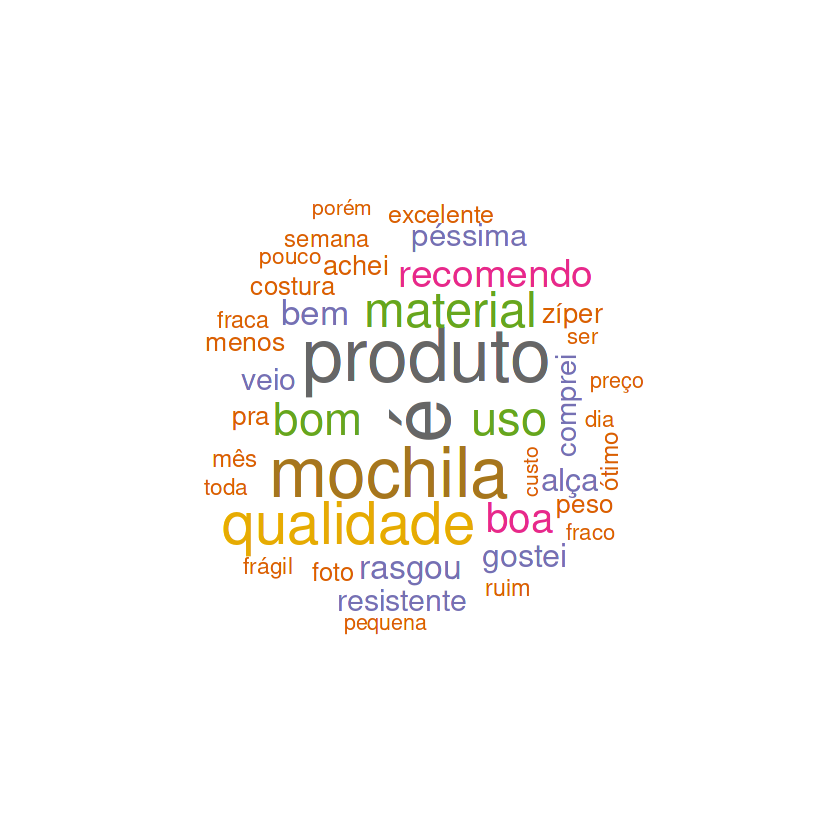

In [16]:
# Criar nuvem de palavras
cont_palav %>% with(wordcloud(word, n, random.order = FALSE, max.words = 40, colors=pal))

Nesta primeira análise, observa-se que as palavras por si só não trazem uma informação precisa, pois muitas delas precisam de outras palavras para terem sentido. Por exemplo, a palavra "qualidade" pode estar associada tanto a "boa" quanto a "péssima", duas palavras que também foram frequentes. No entanto, ainda sim a análise nos dá algumas informações que sugerem qualidade ruim, como "fraca/fraco" e "rasgou".

## Análise de sentimentos com tokens combinados com a palavra "não"
A palavra "não" é uma stopword e por isso foi removida da análise. No entanto, é importante considerá-la, pois ela muda completamente o significado de um token. Por isso, vamos avaliar a frequência de negação dos tokens mais comuns nas análise anterior.

In [17]:
# Selecionar apenas comentários que contém a palavra "não"
coment_cont_nao <- coment_prod %>% filter(str_detect(Comentario, "não"))
nrow(coment_cont_nao)

[1] 169

O procedimento anterior foi realizado para reduzir o volume de dados processado, afinal, não nos interessa processar comentários sem a palavra não neste momento. Dos 700 comentários, restaram apenas 169.

In [18]:
# Extrair tokens bigramas
coment_prod_tokens_bigr <- coment_cont_nao %>%
                            unnest_tokens(word, Comentario, token = "ngrams", n = 2) %>%
                            filter(!grepl('[0-9]', word)) # Remove números

#filter(!grepl('[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]', word))

In [19]:
# Visualizar resultado da extração dos tokens bigramas
head(coment_prod_tokens_bigr, 10)

word
<chr>
bom dia
dia não
não gostei
gostei do
do que
que comprei
comprei vcs
vcs mostra
mostra no


Aqui já vemos que quando a palavra "não" aparece após o token, este não apresenta um significado lógico. Por isso, vamos extrair apenas tokens que contenham a palavra "não" no começo.

In [20]:
# Obter apenas tokens que começam com a palavra "não"
coment_neg <- coment_prod_tokens_bigr %>% filter(str_detect(word, "^não"))

head(coment_neg, 10)

word
<chr>
não gostei
não gostei
não vou
não esse
não tem
não é
não gostei
não viram
não veio


In [21]:
# Contar a frequência com que os bigramas ocorrem
cont_bigr <- coment_neg %>% count(word, sort = T)
head(cont_bigr)

word,n
<chr>,<int>
não é,37
não recomendo,29
não tem,23
não gostei,14
não aguenta,7
não veio,7


Anteriormente, a palavra "recomendo" apareceu 72 vezes. Agora, vemos que 29 ocorrências da palavra "recomendo" estão associadas a palavra "não".

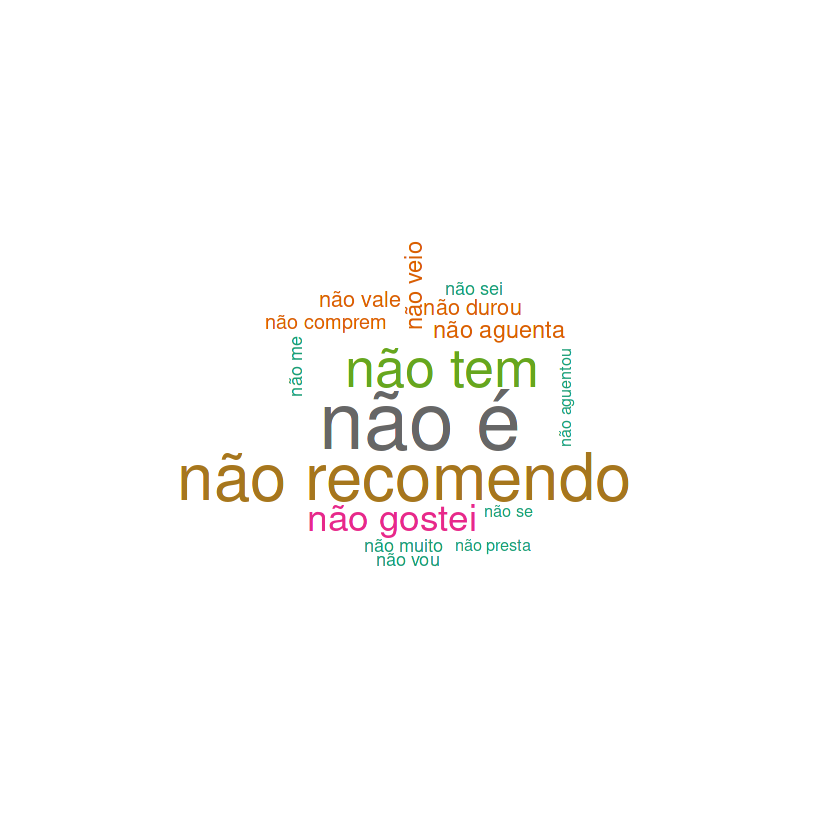

In [22]:
# Criar a nuvem de palabras com os bigramas
cont_bigr %>% with(wordcloud(word, n, random.order = FALSE, max.words = 50, colors=pal))

Vamos visualizar a proporção das vezes em que os tokens mais frequentes vistos na primeira nuvem de palavras tinham significado negativo.

In [23]:
cont_bigr_tokens <- cont_bigr %>% 
  unnest_tokens(tokens, word) %>% 
  filter(tokens != "não") %>% 
  rename(n_neg = n) %>%
  inner_join(cont_palav, by = c("tokens" = "word")) %>%
  arrange(desc(n))  %>%
  select(tokens, n, n_neg)  
head(cont_bigr_tokens, 10)
nrow(cont_bigr_tokens)

tokens,n,n_neg
<chr>,<int>,<int>
é,177,37
mochila,150,1
recomendo,72,29
gostei,55,14
veio,50,7
parece,24,2
vale,21,6
vou,17,4
usei,15,2


[1] 82

In [24]:
# Preparar dados para construir gráfico de barras empilhadas
dados_long <- cont_bigr_tokens[1:10,] %>%
  pivot_longer(cols = c(n_neg, n), names_to = "Tipo", values_to = "Valor") # Transformar os dados para formato longo

head(dados_long)

# Calcular a frequência relativa por token
percentual <- dados_long %>%
                group_by(tokens) %>%
                mutate(Perc = Valor / sum(Valor) * 100)

tokens,Tipo,Valor
<chr>,<chr>,<int>
é,n_neg,37
é,n,177
mochila,n_neg,1
mochila,n,150
recomendo,n_neg,29
recomendo,n,72


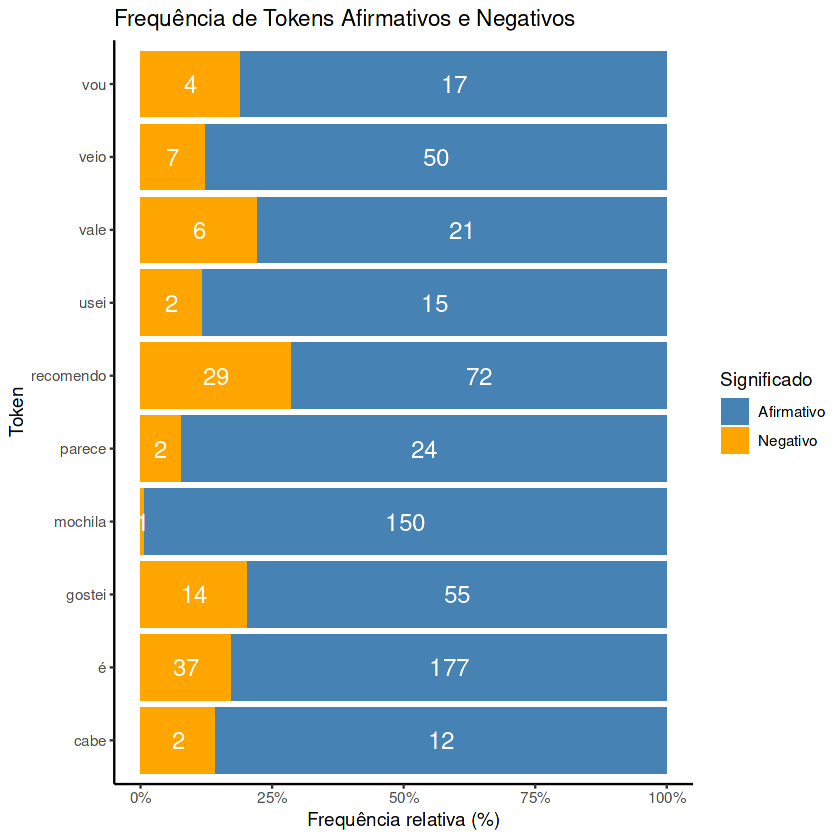

In [25]:
# Gráfico de barras empilhadas com rótulos centralizados
ggplot(percentual, aes(x = tokens, y = Perc, fill = Tipo)) +
  geom_bar(stat = "identity", position = "stack") +  # Barras empilhadas
  geom_text(aes(label = Valor), 
            position = position_stack(vjust = 0.5),  # Centraliza os rótulos
            size = 5, 
            color = "white") +                      # Cor do texto
  coord_flip() +                                    # Inverte os eixos
  scale_fill_manual(
    labels = c("n" = "Afirmativo", "n_neg" = "Negativo"),
    values = c("n" = "steelblue", "n_neg" = "orange")
  ) +
  labs(title = "Frequência de Tokens Afirmativos e Negativos",
       x = "Token",
       y = "Frequência relativa (%)",
       fill = "Significado") +
  theme_classic() +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) # Formato de porcentagem


Observa-se pelo gráfico que a maioria dos tokens mais frequentes são, de fato, afirmativos. Agora, veremos quais palavras mais caracterizam os sentimentos positivos e negativos em relação ao produto com base nos comentários.
Primeiramente, vamos classificar os tokens em positivos, negativos ou neutros de acordo com um dicionário de sentimentos.

In [26]:
# Adicionar dicionário de sentimentos em Português
# https://b2find.eudat.eu/dataset/b6bd16c2-a8ab-598f-be41-1e7aeecd60d3
# https://b2share.eudat.eu/records/93ab120efdaa4662baec6adee8e7585f
dicio <- read.delim("/kaggle/input/sentilex/SentiLex-lem-PT02.txt", sep = ";", stringsAsFactors = FALSE, header = FALSE)
head(dicio, 5)

,V1,V2,V3,V4
,<chr>,<chr>,<chr>,<chr>
1,à-vontade.PoS=N,TG=HUM:N0,POL:N0=1,ANOT=MAN
2,abafado.PoS=Adj,TG=HUM:N0,POL:N0=-1,ANOT=JALC
3,abafante.PoS=Adj,TG=HUM:N0,POL:N0=-1,ANOT=MAN
4,abaixado.PoS=Adj,TG=HUM:N0,POL:N0=-1,ANOT=JALC
5,abalado.PoS=Adj,TG=HUM:N0,POL:N0=-1,ANOT=JALC


In [27]:
# Editar dicionário para que seja possível fazer uniões
dicio <- dicio %>% select(V1, V3) %>% mutate(V1 = str_extract(V1, "^[^\\.]*")) %>% mutate (V3 = str_extract(V3, "(?<=\\=).*")) %>% rename(word = V1, polar = V3)
head(dicio, 5)

,word,polar
,<chr>,<chr>
1,à-vontade,1
2,abafado,-1
3,abafante,-1
4,abaixado,-1
5,abalado,-1


In [28]:
# Retirar comentários que contém a palavra "não" para evitar confusão na interpretação da frequência das palavras
coment_prod_tokens <- coment_prod %>%
                        filter(!str_detect(Comentario, "não")) %>%
                        unnest_tokens(word, "Comentario") %>%
                        anti_join(get_stopwords(language = 'pt'))

Joining with `by = join_by(word)`


In [29]:
# Associar um sentimento a cada token
sentim <- coment_prod_tokens %>% inner_join(dicio, by = "word", relationship =
  "many-to-many")

In [30]:
# Instalar e carregar pacote que produz nuvem de palavras para diferentes categorias
# install.packages("reshape2")
library("reshape2")


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




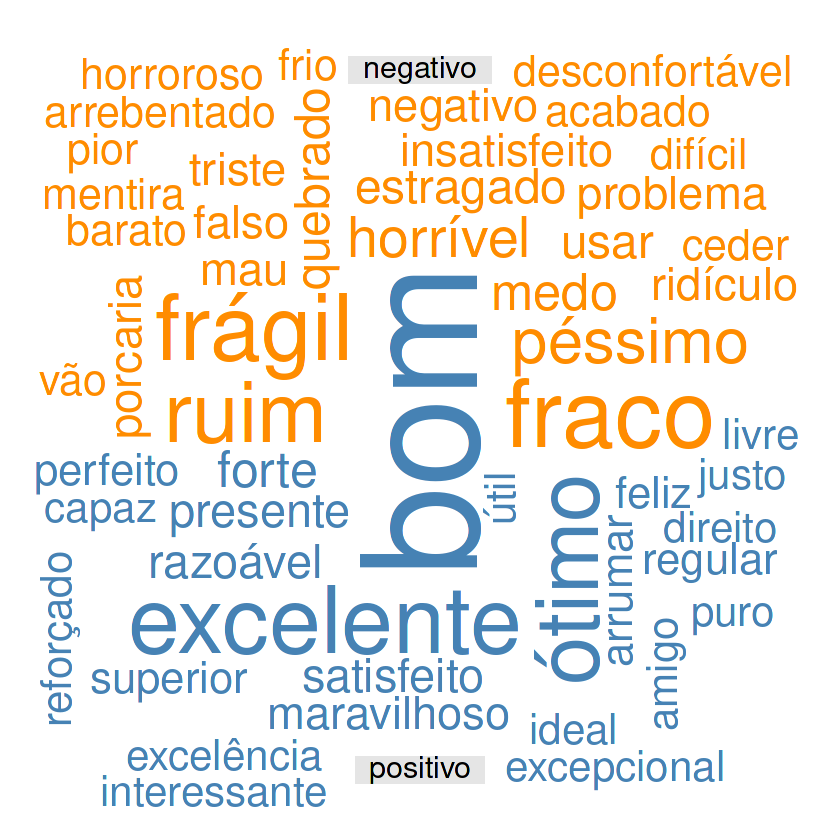

In [31]:
# Criar nuvem de palavras
sentim <- sentim %>% filter(polar != 0) %>% # retirar sentimentos neutros
    mutate(sentim_pos_neg = ifelse(polar==-1,"negativo","positivo"))

suppressWarnings({sentim %>%
  count(word, sentim_pos_neg, sort = TRUE) %>%
  acast(word ~ sentim_pos_neg, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("darkorange", "steelblue"),
                   scale = c(8, 2),
                   max.words = 100,
                   title.size = 1.5)
})

Na nuvem de palavas acima, algumas palavras não fazem sentido neste contexto, como "amigo","arrumar", "vão", "usar", "regular" e "direito", mas a grande maioria das palavras refletem uma opinião sobre o produto. Visualmente, percebe-se uma divisão equalitária entre os grupos, com uma tendência maior para a opinião positiva, dado que a palavra "bom" é a maior de todas, ou seja, está em maior proporção. Para termos uma visão geral dos sentimentos associados ao produto, podemos utilizar uma abordagem quantitativa, a qual utiliza os pesos atribuídos aos sentimentos negativos (-1) e positivos (1).

In [32]:
# Realizar análise exploratória dos sentimentos sobre o produto
sentim_dist <- sentim %>% distinct(word, .keep_all = TRUE)
print(paste("Número total de sentimentos distintos: ", nrow(sentim_dist)))
print(paste("Número de sentimentos positivos: ", sum(sentim_dist$polar == 1)))
print(paste("Número de ocorrências de sentimentos positivos: ", sum(sentim$polar == 1)))
print(paste("Número de sentimentos negativos: ", sum(sentim_dist$polar == -1)))
print(paste("Número de ocorrências de sentimentos negativos: ", sum(sentim$polar == -1)))

[1] "Número total de sentimentos distintos:  67"
[1] "Número de sentimentos positivos:  34"
[1] "Número de ocorrências de sentimentos positivos:  189"
[1] "Número de sentimentos negativos:  33"
[1] "Número de ocorrências de sentimentos negativos:  118"


In [33]:
# Somar o vetor de sentimentos
sentim_geral <- sum(as.numeric(sentim$polar))
sentim_geral

[1] 71

O resultado indica que houve 71 ocorrências de sentimentos positivos a mais do que negativos, o que indica um sentimento geral positivo nos comentários sobre o produto. Podemos criar um índice para termos ideia de quão negativo esse resultado é dividindo-o pelo número total de sentimentos positivos e negativos.
Este índica vai de -1 a 1, sendo que o sinal indica a polaridade de sentimento predominante e quanto mais próximo o valor estiver dos extremos, maior é a proporção de sentimentos desta polaridade em relação aos sentimentos da polaridade oposta. Valores próximos de zero indicam que a proporção entre sentimentos opostos é similar.

In [34]:
sentim_geral_index <- sentim_geral/sum(abs(as.numeric(sentim$polar)))
sentim_geral_index

[1] 0.2312704

Observa-se pelo resultado de sentim_geral_index que há uma sentimento geral positivo fraco, pois o valor é mais próximo de 0 do que de 1. Ou seja, os sentimentos positivos e negativos estão ligeiramente equilibrados. O ideal era que o valor fosse mais próximo de 1, pois isso indicaria maior satisfação dos clientes em relação ao produto. A análise mostra que parte dos clientes demonstra uma boa impressão sobre o produo após a compra, mas outra parte apresenta opinião negativa que está associada à baixa resistência do produto verificada após o uso. O anúncio alega que várias estrutaras da mochila são reforçadas, no entanto, clientes relataram que o produto danificou, o que foi expresso em adjetivos como "estragado" e "arrebentado". Clientes mencionaram estar "tristes" e "insatisfeitos" com o produto, possivelmente em decorrência do dano observado.